

# Simple Self - Attention Block:

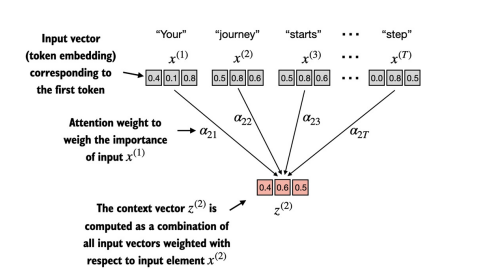

In [1]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)


In [17]:
# For 1 element:

query = inputs[1]
print(f"{query=}")

# calculate the attention socores:
attention_scores = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attention_scores[i] += torch.dot(x_i, query)

print(attention_scores)

# normalise the attention scores:
normalised_attention_scores = torch.softmax(attention_scores, dim=0)
print(normalised_attention_scores)
print(f"sum: {normalised_attention_scores.sum()}")

#calculate the context vector:
context_vector = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vector += normalised_attention_scores[i] * query
print(context_vector)

query=tensor([0.5500, 0.8700, 0.6600])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum: 1.0
tensor([0.5500, 0.8700, 0.6600])


In [23]:
# for all inputs:

# attention scores:
attention_scores = torch.empty(6,6)
# For loops are slow
# for i, x_i in enumerate(inputs):
#     for j, x_j in enumerate(inputs):
#         attention_scores[i][j] = torch.dot(x_i, x_j)
attention_scores = inputs @ inputs.T #faster matrix multiplaction way
print(attention_scores)

# normalised attention scores:
normalised_attention_scores = torch.softmax(attention_scores, dim=1)
print(normalised_attention_scores)

#context vectors:
context_vector = normalised_attention_scores @ inputs
print(context_vector)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# Self Attention with trainable weights:


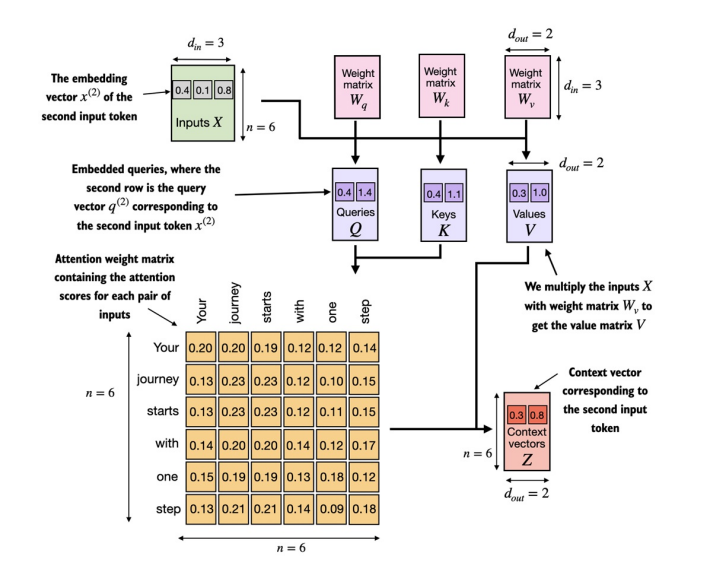

In [6]:
# From attention.py file : Class --> SelfAttention_v1
from attention import SelfAttention_v1

d_in = inputs.shape[1] 
d_out = 2

torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)

print(sa_v1(inputs))

tensor([[0.2940, 0.7919],
        [0.2988, 0.8038],
        [0.2986, 0.8032],
        [0.2905, 0.7834],
        [0.2890, 0.7799],
        [0.2936, 0.7909]], grad_fn=<MmBackward0>)
